In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/content/drive/MyDrive/Pembelajaran Mesin/melb_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# Memilih subset prediktor dan menetapkan variabel target

# Memilih subset kolom yang akan digunakan sebagai prediktor
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = df[predictors]  # X akan berisi subset data dengan kolom-kolom prediktor

# Menetapkan variabel target dari kolom 'Price'
y = df['Price']  # y akan berisi data dari kolom 'Price' yang akan diprediksi


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih (training) dan data validasi (validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# test_size=0.2 menentukan bahwa 20% data akan digunakan sebagai data validasi, sementara 80% sisanya untuk data latih
# random_state=0 memastikan hasil split data konsisten jika kode dijalankan kembali


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model XGBoost
model = XGBRegressor(random_state=0)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions = model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error pada data validasi:", mae)


Mean Absolute Error pada data validasi: 235734.8582991992


output di atas menunjukkan bahwa model XGBoost memiliki tingkat kesalahan rata-rata (Mean Absolute Error) sebesar 235734.86 pada data validasi. Nilai MAE yang besar ini bisa mengindikasikan bahwa model belum cukup akurat atau terdapat skala besar pada target prediksi.

In [ ]:
# Inisialisasi model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=0)

# Melatih model dengan data latih
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_500 = model_500.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae_500 = mean_absolute_error(y_valid, predictions_500)
print("Mean Absolute Error pada data validasi dengan 500 estimators:", mae_500)


Mean Absolute Error pada data validasi dengan 500 estimators: 242472.02245446545


Output di atas menunjukkan hasil evaluasi model XGBoost setelah dilakukan modifikasi pada jumlah estimators menjadi 500. Berikut adalah kesimpulan dari hasil tersebut:

Setelah menambah jumlah estimators pada model XGBoost menjadi 500, nilai Mean Absolute Error (MAE) pada data validasi adalah 242472.02. Ini menunjukkan sedikit perubahan (peningkatan error) dari MAE sebelumnya yang sebesar 235734.86.

Dengan kata lain, penambahan estimators tidak memperbaiki performa model, malah menghasilkan error yang sedikit lebih tinggi. Ini bisa mengindikasikan bahwa menambah estimators saja mungkin tidak cukup untuk meningkatkan akurasi model pada data ini atau ada kemungkinan overfitting yang mulai terjadi.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Memperbarui model XGBoost dengan learning rate khusus dan 90 estimators tanpa early stopping
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=0)

# Melatih model dengan data pelatihan tanpa early stopping
model_custom.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_custom = model_custom.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae_custom = mean_absolute_error(y_valid, predictions_custom)
print("Mean Absolute Error pada data validasi dengan custom learning rate:", mae_custom)


Mean Absolute Error pada data validasi dengan custom learning rate: 251693.55793216126



Output di atas menunjukkan hasil dari pengujian model XGBoost yang telah disesuaikan dengan learning rate sebesar 0.05 dan 90 estimators tanpa menggunakan early stopping.

Berikut kesimpulannya:

*   Model XGBoost yang dioptimasi dengan learning rate rendah (0.05) dan estimators berjumlah 90 menghasilkan nilai Mean Absolute Error (MAE) sebesar 251693.56 pada data validasi.

*   Nilai MAE ini lebih besar dibandingkan dengan pengaturan sebelumnya, yang berarti bahwa model ini memiliki performa yang lebih rendah atau mengalami penurunan akurasi pada data validasi.

*   Meskipun learning rate yang lebih kecil sering digunakan untuk mengurangi overfitting dan memberikan kestabilan pelatihan, dalam kasus ini, nilai error tetap tinggi. Hal ini mungkin menunjukkan bahwa model tidak cukup kompleks atau memerlukan penyesuaian parameter lainnya untuk mencapai performa yang lebih baik.

Secara keseluruhan, perubahan learning rate dan jumlah estimators pada model ini tidak menghasilkan peningkatan akurasi, justru meningkatkan error pada data validasi.








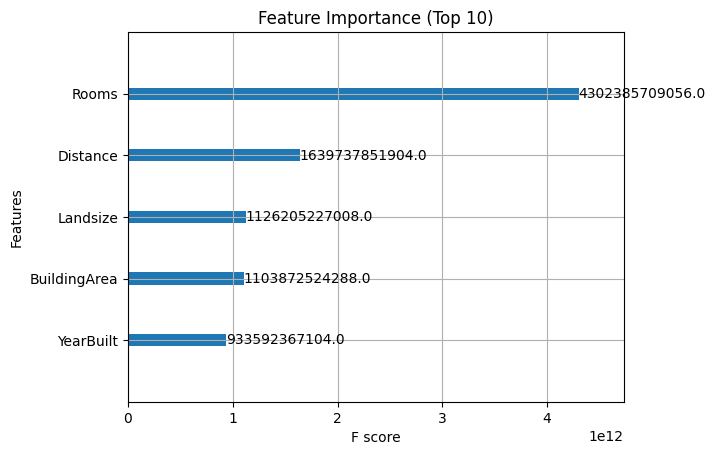

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Membuat model XGBoost dengan data Anda
# Gunakan XGBRegressor() untuk tugas regresi, karena y_train berisi data numerik kontinu
model = xgb.XGBRegressor()  # Mengubah dari XGBClassifier() ke XGBRegressor()
model.fit(X_train, y_train)

# Visualisasi Feature Importance
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Feature Importance (Top 10)")
plt.show()

Output di atas menunjukkan grafik Feature Importance dari model XGBoost, yang mengidentifikasi fitur-fitur paling berpengaruh dalam memprediksi target. Dari hasil tersebut, fitur Rooms memiliki nilai kepentingan tertinggi, menandakan bahwa jumlah ruangan adalah faktor paling signifikan dalam model ini. Fitur-fitur lain seperti Distance, Landsize, BuildingArea, dan YearBuilt juga memiliki pengaruh, tetapi tidak sebesar Rooms. Nilai F score pada sumbu horizontal menunjukkan bobot pentingnya masing-masing fitur, dengan Rooms memiliki kontribusi yang jauh lebih besar dibandingkan fitur lainnya. Ini menunjukkan bahwa fitur Rooms mendominasi dalam prediksi model, sementara fitur lain hanya memberikan kontribusi tambahan. Grafik ini memberikan wawasan tentang fitur-fitur yang paling relevan dan dapat membantu dalam optimisasi atau penyederhanaan model dengan mempertimbangkan fitur-fitur yang paling signifikan saja.

<Figure size 2000x1000 with 0 Axes>

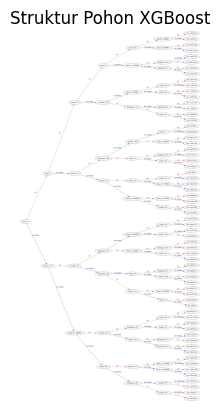

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Plot pohon ke-n dalam model (misalnya, pohon pertama: 0)
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')
plt.title("Struktur Pohon XGBoost")
plt.show()

Output di atas menunjukkan struktur pohon keputusan (decision tree) pertama dalam model XGBoost yang telah dilatih. Visualisasi ini dibuat menggunakan fungsi plot_tree dari library XGBoost. Diagram ini menggambarkan cabang-cabang dan node dalam pohon pertama model, menunjukkan bagaimana model memutuskan pembagian berdasarkan fitur tertentu di setiap level.

Pada setiap node, terdapat informasi tentang kondisi atau split yang digunakan untuk membagi data, seperti nilai dari suatu fitur. Cabang-cabang ini berlanjut hingga mencapai node daun, yang merupakan hasil akhir atau prediksi untuk subset data yang memenuhi semua kondisi di sepanjang cabang tersebut. Arah cabang rankdir=LR berarti pohon dibangun dari kiri ke kanan.

Visualisasi ini berguna untuk memahami bagaimana model XGBoost melakukan keputusan di setiap tahap, khususnya dalam pohon pertama. Struktur ini menunjukkan kompleksitas pohon, di mana model membuat keputusan berdasarkan kombinasi fitur dan nilai spesifiknya untuk memprediksi output.

In [ ]:
# Menggunakan subset data yang lebih kecil, misalnya 20%
subset_size = int(0.2 * len(X_train))
X_small = X_train[:subset_size]
y_small = y_train[:subset_size]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


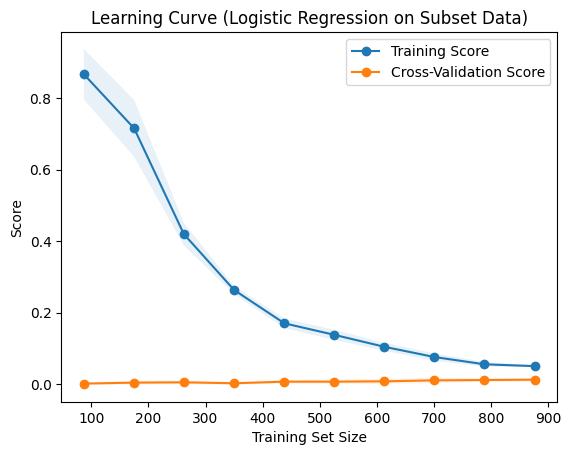

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan Logistic Regression dengan subset data
simple_model = LogisticRegression(max_iter=1000)
train_sizes, train_scores, test_scores = learning_curve(
    simple_model, X_small, y_small, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Visualisasi Learning Curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title("Learning Curve (Logistic Regression on Subset Data)")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


Output di atas menampilkan Learning Curve dari model Logistic Regression pada subset data. Grafik ini menunjukkan hubungan antara ukuran data pelatihan dengan kinerja model, diukur menggunakan training score dan cross-validation score.

Berikut adalah interpretasi dari hasil output tersebut:


*   Sumbu X (Training Set Size) menunjukkan jumlah data pelatihan yang digunakan untuk melatih model. Semakin ke kanan, semakin banyak data pelatihan yang digunakan.

*   Sumbu Y (Score) menunjukkan skor akurasi model, baik pada data pelatihan (training score) maupun pada data validasi (cross-validation score).

*   Training Score (diwakili oleh garis biru) menunjukkan akurasi model pada data pelatihan. Terlihat bahwa nilai training score sangat tinggi di awal ketika ukuran data pelatihan sedikit, namun menurun seiring bertambahnya jumlah data pelatihan.

*   Cross-Validation Score (diwakili oleh garis oranye) menunjukkan performa model pada data validasi (data yang tidak digunakan untuk pelatihan). Nilai cross-validation score stabil di level yang rendah, menunjukkan bahwa model tidak mampu mencapai performa yang baik pada data yang tidak terlihat selama pelatihan.

*   Gap antara Training Score dan Cross-Validation Score mengindikasikan overfitting pada model ini. Model memiliki performa yang sangat baik pada data pelatihan, namun buruk pada data validasi. Artinya, model belajar terlalu spesifik pada data pelatihan dan tidak mampu menggeneralisasi pada data baru.

*   User Warning yang terlihat di bagian bawah mengatakan bahwa kelas target dalam data hanya memiliki satu anggota pada beberapa subset, yang kurang dari jumlah pembagian n_splits=5 dalam cross-validation. Ini mengindikasikan bahwa data target mungkin tidak seimbang atau terlalu sedikit, yang dapat mempengaruhi akurasi model.


Secara keseluruhan, grafik ini menunjukkan bahwa model Logistic Regression mengalami overfitting pada subset data ini. Skor validasi yang rendah dan perbedaan besar antara training score dan cross-validation score menunjukkan bahwa model tidak mampu menggeneralisasi dengan baik, yang bisa disebabkan oleh ukuran data yang tidak mencukupi atau ketidakseimbangan kelas pada target.

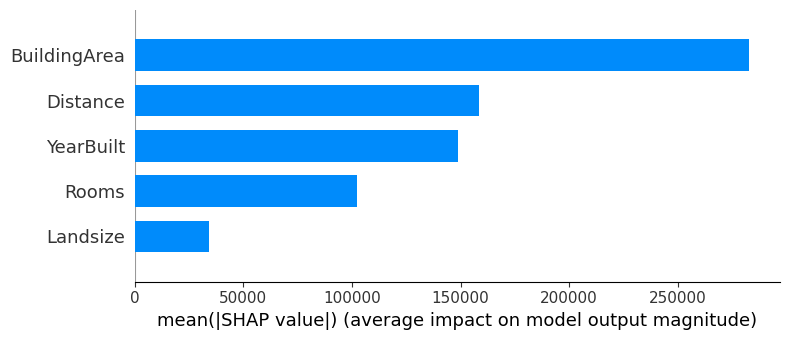

In [ ]:
import shap

# Membuat objek SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")


Output di atas menampilkan visualisasi SHAP (SHapley Additive exPlanations) dalam bentuk grafik bar yang menunjukkan fitur-fitur terpenting beserta nilai rata-rata SHAP mereka, mengindikasikan dampak masing-masing fitur pada prediksi model. Fitur BuildingArea memiliki nilai SHAP rata-rata tertinggi, menandakan bahwa fitur ini memiliki pengaruh terbesar terhadap prediksi model. Diikuti oleh Distance dan YearBuilt, yang meskipun berpengaruh besar, tetap berada di bawah BuildingArea dalam hal kontribusi terhadap output model. Fitur lainnya, seperti Rooms dan Landsize, juga memiliki dampak pada prediksi namun dengan pengaruh yang lebih kecil. Sumbu X pada grafik ini mewakili nilai rata-rata absolut SHAP, yaitu ukuran dari dampak rata-rata setiap fitur terhadap output model, tanpa menunjukkan apakah fitur tersebut meningkatkan atau menurunkan nilai prediksi. Visualisasi ini membantu memahami seberapa besar masing-masing fitur mendorong hasil prediksi, dan secara keseluruhan, grafik ini memudahkan interpretasi model dengan menunjukkan fitur mana yang paling signifikan dalam memengaruhi hasil prediksi. Informasi ini sangat berguna untuk analisis lebih lanjut, membantu dalam pengambilan keputusan yang fokus pada fitur-fitur yang memiliki dampak terbesar.

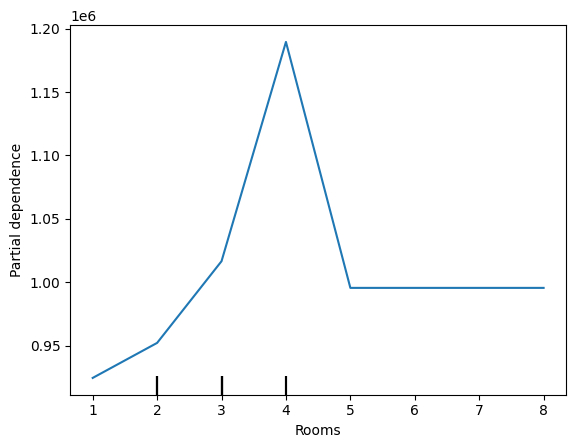

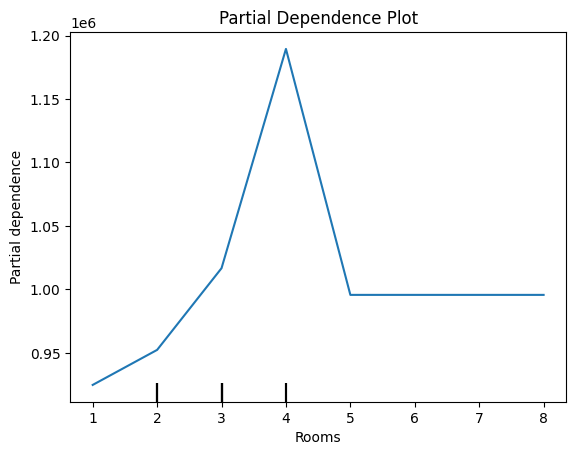

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pilih fitur yang ingin divisualisasikan (misalnya, fitur pertama)
features_to_plot = [0]  # Ganti dengan nama atau indeks fitur yang relevan

# Buat objek PartialDependenceDisplay
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features=features_to_plot, grid_resolution=20
)

# Tampilkan plot
display.plot()
plt.title("Partial Dependence Plot")
plt.show()

Output di atas adalah Partial Dependence Plot (PDP) yang menunjukkan hubungan antara fitur Rooms dan prediksi model. Grafik ini membantu memahami bagaimana perubahan pada jumlah ruangan (Rooms) memengaruhi prediksi, dengan asumsi bahwa variabel lain dalam model tetap konstan.

Pada grafik tersebut, terlihat bahwa ketika jumlah Rooms meningkat dari 1 ke 4, nilai Partial Dependence juga meningkat, menunjukkan bahwa prediksi model cenderung naik seiring bertambahnya jumlah ruangan hingga mencapai puncak di sekitar 4 ruangan. Namun, setelah mencapai 4 ruangan, nilai Partial Dependence menurun dan stabil, menandakan bahwa penambahan ruangan di atas 4 tidak lagi memberikan pengaruh signifikan terhadap prediksi model.

Interpretasi ini menunjukkan bahwa model memperkirakan nilai lebih tinggi untuk jumlah ruangan antara 3 hingga 4, tetapi penambahan ruangan setelah itu tidak lagi meningkatkan hasil prediksi secara signifikan. Grafik seperti ini sangat berguna untuk mengidentifikasi titik-titik di mana penambahan suatu fitur (dalam hal ini Rooms) tidak lagi memberikan dampak positif pada hasil prediksi, dan dapat membantu dalam optimisasi serta interpretasi model.